# Flight Fair Prediction
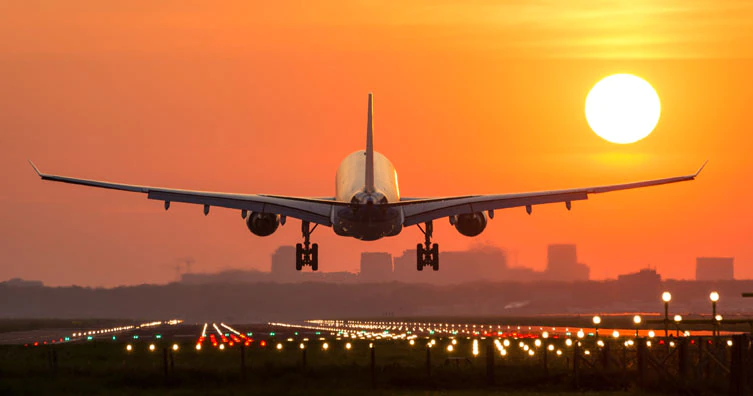
### __________________________________________________________________________________________

# Importing Libraries:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

# Importing dataset:

In [2]:
data=pd.read_excel("Data_Train.xlsx", sheet_name="Sheet1")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
# Shape:
data.shape

(10683, 11)

In [4]:
# Columns:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
# Datatypes of columns:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
# Null Values:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
# Dropping all null values:
data.dropna(inplace=True)
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Feature Engineering

In [8]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Date_of_Journey:

In [9]:
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y')
data['Date_of_Journey'].dtype

dtype('<M8[ns]')

In [10]:
# Creating two new columns for journey day and month:

dates=[]
months=[]
days=[]

for i in data['Date_of_Journey']:
    dt=i.day
    mo=i.month
    da=i.dayofweek
    
    dates.append(dt)
    months.append(mo)
    days.append(da)
    
data['Journey_date']=dates
data['Journey_month']=months
data['Journey_day']=days

data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,6
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,4


In [11]:
# Now we can drop 'Date_of_Journey' column:
data.drop('Date_of_Journey', axis=1, inplace=True)
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,4


## Dep_Time:

* Departure time is when a plane leaves the gate.
* It is the time that the flight is scheduled to close the doors.

In [12]:
data['Dep_Time']=pd.to_datetime(data['Dep_Time'])
data['Dep_Time'].dtype

dtype('<M8[ns]')

In [13]:
# Creating two new columns for departure hour and minute:

hours=[]
minutes=[]

for i in data['Dep_Time']:
    h=i.hour
    m=i.minute
    
    hours.append(h)
    minutes.append(m)
    
data['Dep_hour']=hours
data['Dep_minute']=minutes

data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_day,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-10-04 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-04 05:50:00,13:15,7h 25m,2 stops,No info,7662,1,5,2,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-04 09:25:00,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-10-04 18:05:00,23:30,5h 25m,1 stop,No info,6218,12,5,6,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-10-04 16:50:00,21:35,4h 45m,1 stop,No info,13302,1,3,4,16,50


In [14]:
# Now we can drop 'Dep_Time' column:
data.drop('Dep_Time', axis=1, inplace=True)
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_day,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,6,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,4,16,50


## Arrival_Time and Duration:

* Arrival_Time and Duration are not that much important. So, those columns can be removed

In [15]:
data.drop(['Arrival_Time','Duration'], axis=1, inplace=True)
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_day,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,6,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,6,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,4,16,50


## Additional_Info:

In [16]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

* More than 80% of data is "NO info". So, 'Additional_Info' column can be removed

In [17]:
data.drop('Additional_Info', axis=1, inplace=True)
data.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_date,Journey_month,Journey_day,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897,24,3,6,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,1,5,2,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,13882,9,6,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,6218,12,5,6,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,13302,1,3,4,16,50


## Route and Total_Stops:

In [18]:
data[['Route','Total_Stops']].head()

,Route,Total_Stops
0,BLR → DEL,non-stop
1,CCU → IXR → BBI → BLR,2 stops
2,DEL → LKO → BOM → COK,2 stops
3,CCU → NAG → BLR,1 stop
4,BLR → NAG → DEL,1 stop


**Actually 'Route' and 'Total_Stops' column gives same information. So, we can drop 'Route' column**

In [19]:
data.drop('Route', axis=1, inplace=True)

In [20]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

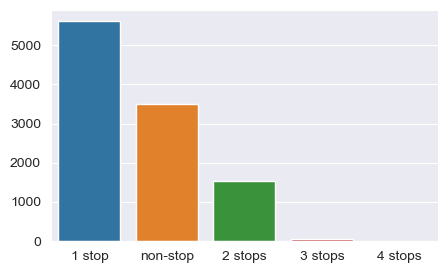

In [21]:
plt.figure(figsize=(5,3))
sns.barplot(x=data['Total_Stops'].value_counts().index,
            y=data['Total_Stops'].value_counts().values);

* '3 stops' and '4 stops' values are very less when compared to others. So, they can be removed. 

In [22]:
data=data[data['Total_Stops'].isin(['1 stop','non-stop','2 stops'])]
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Journey_day,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,6,22,20
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2,5,50
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,6,9,25
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,6,18,5
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,4,16,50


In [23]:
data.shape

(10636, 10)

In [24]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
Name: Total_Stops, dtype: int64

In [25]:
data['Total_Stops']=data['Total_Stops'].replace({'1 stop':1,'non-stop':0,'2 stops':2})
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Journey_day,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,6,22,20
1,Air India,Kolkata,Banglore,2,7662,1,5,2,5,50
2,Jet Airways,Delhi,Cochin,2,13882,9,6,6,9,25
3,IndiGo,Kolkata,Banglore,1,6218,12,5,6,18,5
4,IndiGo,Banglore,New Delhi,1,13302,1,3,4,16,50


## Airline:

In [26]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1713
Multiple carriers                    1188
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

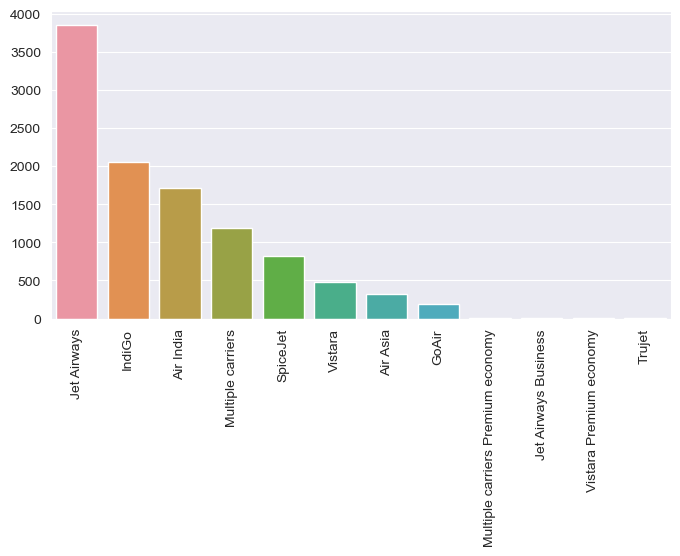

In [27]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=90)
sns.barplot(x=data['Airline'].value_counts().index,
            y=data['Airline'].value_counts().values);

* 'Multiple carriers Premium economy', 'Jet Airways Business', 'Vistara Premium economy' and 'Trujet', values are very less when compared to others. So, they can be removed. 

In [28]:
data=data[data['Airline'].isin(['Jet Airways','IndiGo','Air India','Multiple carriers','SpiceJet','Vistara','Air Asia','GoAir'])]
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Journey_day,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,6,22,20
1,Air India,Kolkata,Banglore,2,7662,1,5,2,5,50
2,Jet Airways,Delhi,Cochin,2,13882,9,6,6,9,25
3,IndiGo,Kolkata,Banglore,1,6218,12,5,6,18,5
4,IndiGo,Banglore,New Delhi,1,13302,1,3,4,16,50


In [29]:
data['Airline'].value_counts()

Jet Airways          3849
IndiGo               2053
Air India            1713
Multiple carriers    1188
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
Name: Airline, dtype: int64

## Source:

In [30]:
data['Source'].value_counts()

Delhi       4496
Kolkata     2860
Banglore    2183
Mumbai       694
Chennai      380
Name: Source, dtype: int64

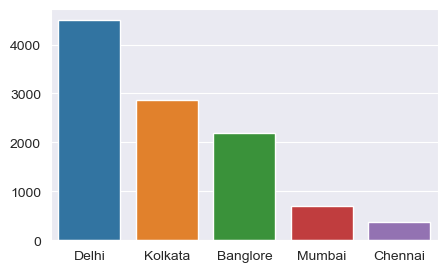

In [31]:
plt.figure(figsize=(5,3))
sns.barplot(x=data['Source'].value_counts().index,
            y=data['Source'].value_counts().values);

## Destination:

In [32]:
data['Destination'].value_counts()

Cochin       4496
Banglore     2860
Delhi        1264
New Delhi     919
Hyderabad     694
Kolkata       380
Name: Destination, dtype: int64

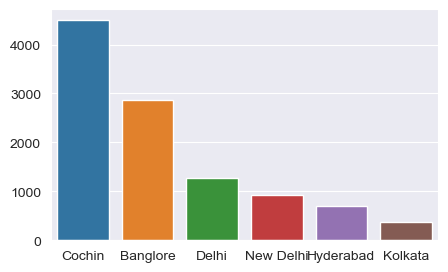

In [33]:
plt.figure(figsize=(5,3))
sns.barplot(x=data['Destination'].value_counts().index,
            y=data['Destination'].value_counts().values);

# Outliers Removal

In [34]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Journey_day,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,6,22,20
1,Air India,Kolkata,Banglore,2,7662,1,5,2,5,50
2,Jet Airways,Delhi,Cochin,2,13882,9,6,6,9,25
3,IndiGo,Kolkata,Banglore,1,6218,12,5,6,18,5
4,IndiGo,Banglore,New Delhi,1,13302,1,3,4,16,50


## Airline:

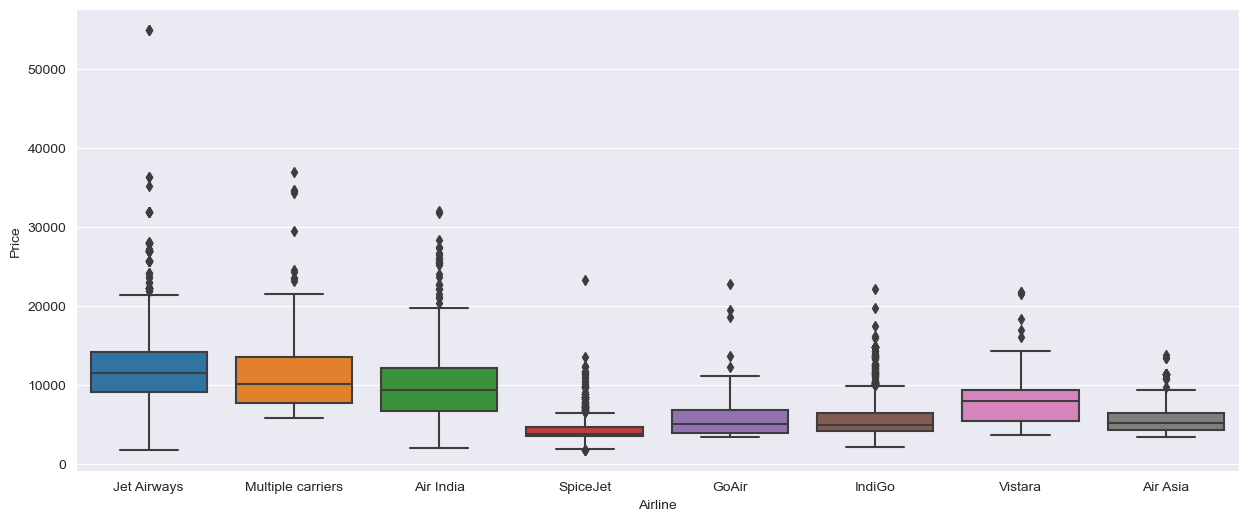

In [35]:
plt.figure(figsize=(15,6))
sns.boxplot(y="Price", x="Airline", data=data.sort_values("Price", ascending = False))
plt.show()

In [36]:
outliers=[]
for key, d in data.groupby('Airline'):
    
    mean=d['Price'].mean()
    std=d['Price'].std()
    
    lower=mean-(2*std)
    upper=mean+(2*std)
    
    for i in d['Price']:
        if( (i<lower)|(i>upper) ):
            outliers.append(i)

In [37]:
data=data[~(data['Price'].isin(outliers))]
data.shape

(10206, 10)

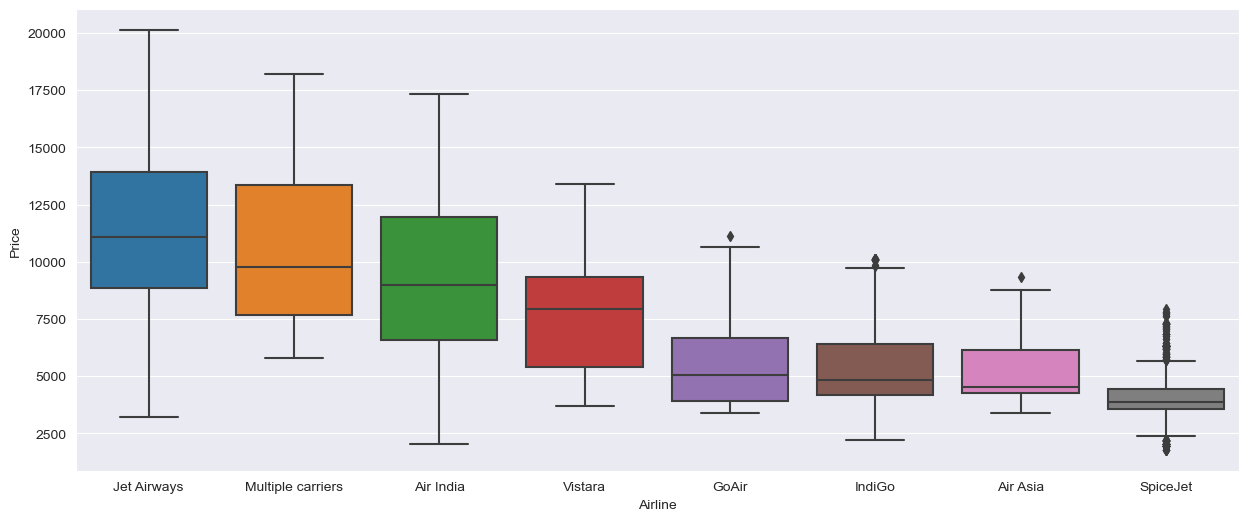

In [38]:
plt.figure(figsize=(15,6))
sns.boxplot(y="Price", x="Airline", data=data.sort_values("Price", ascending = False))
plt.show()

## Source:

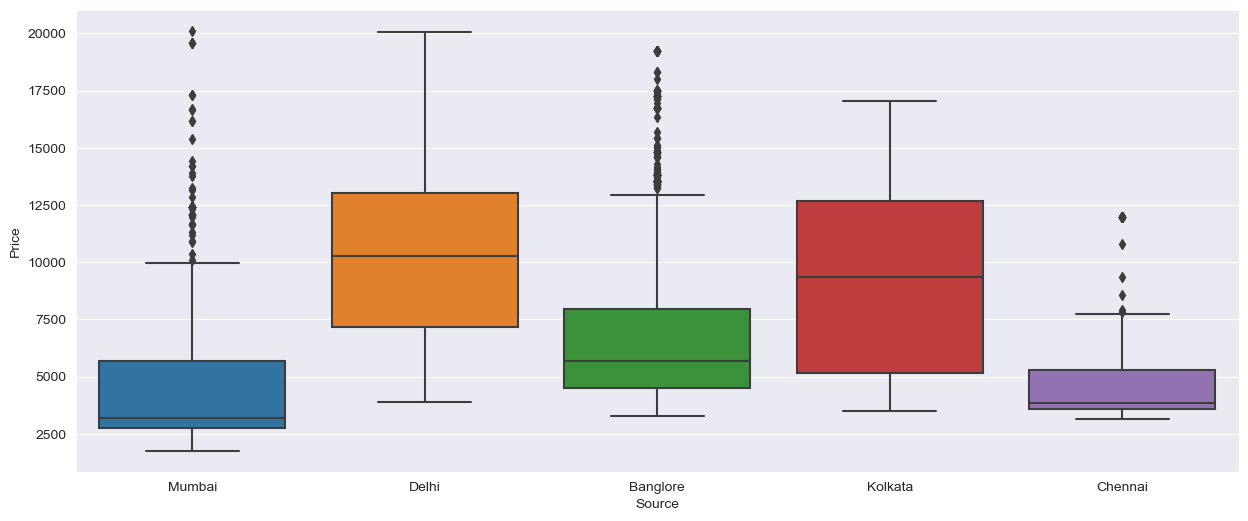

In [39]:
plt.figure(figsize=(15,6))
sns.boxplot(y="Price", x="Source", data=data.sort_values("Price", ascending = False))
plt.show()

In [40]:
outliers=[]
for key, d in data.groupby('Source'):
    
    mean=d['Price'].mean()
    std=d['Price'].std()
    
    lower=mean-(2*std)
    upper=mean+(2*std)
    
    for i in d['Price']:
        if( (i<lower)|(i>upper) ):
            outliers.append(i)

In [41]:
data=data[~(data['Price'].isin(outliers))]
data.shape

(9960, 10)

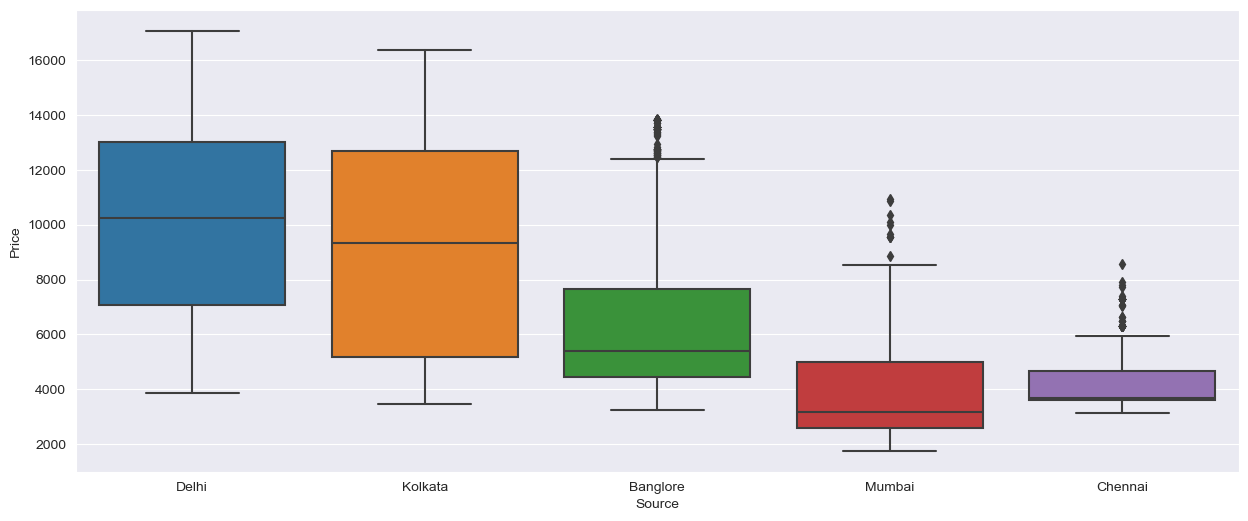

In [42]:
plt.figure(figsize=(15,6))
sns.boxplot(y="Price", x="Source", data=data.sort_values("Price", ascending = False))
plt.show()

## Destination:

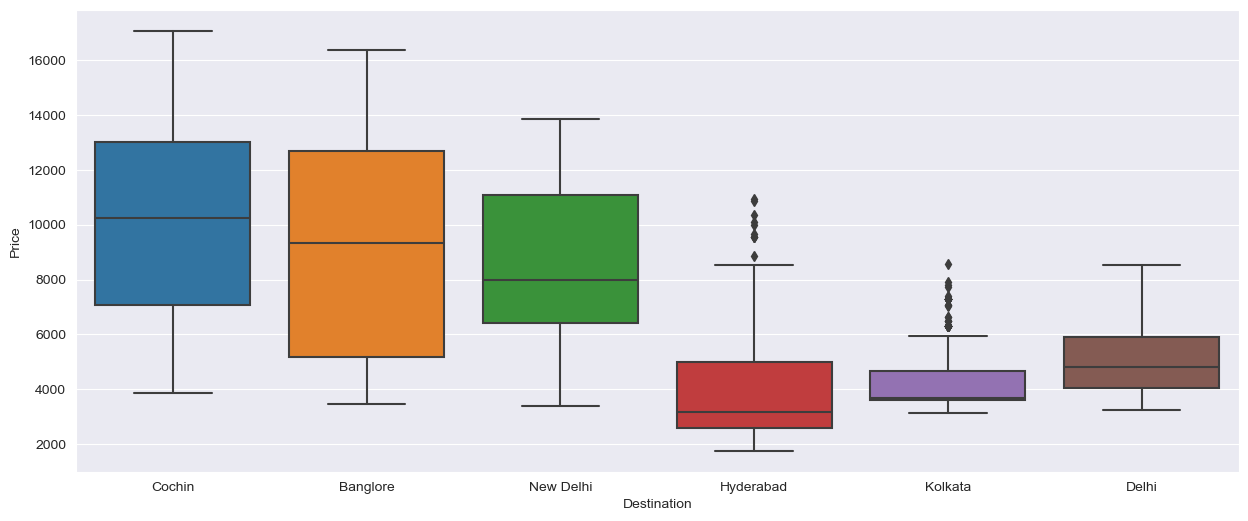

In [43]:
plt.figure(figsize=(15,6))
sns.boxplot(y="Price", x="Destination", data=data.sort_values("Price", ascending = False))
plt.show()

# Encoding Features:

## Airline:

In [44]:
air_df=pd.get_dummies(data['Airline'], drop_first=True)
air_df.head()

,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Vistara
0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0


## Source:

In [45]:
Source=data[["Source"]]

src_df=pd.get_dummies(Source, drop_first=True)
src_df.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
5,0,0,1,0


## Destination:

In [46]:
Destination=data[["Destination"]]

dest_df=pd.get_dummies(Destination, drop_first=True)
dest_df.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
5,0,0,0,0,0


## Concatenate all the data frames:

In [47]:
df=pd.concat([data, air_df, src_df, dest_df], axis=1)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Journey_day,Dep_hour,Dep_minute,...,Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,6,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,2,5,50,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,6,9,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,6,18,5,...,0,0,0,1,0,0,0,0,0,0
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,0,9,0,...,0,0,0,1,0,0,0,0,0,0


* Now we can drop 'Airline', 'Source' and 'Destination' columns

In [48]:
df.drop(['Airline','Source','Destination'], axis=1, inplace=True)
df.head()

,Total_Stops,Price,Journey_date,Journey_month,Journey_day,Dep_hour,Dep_minute,Air India,GoAir,IndiGo,...,Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,6,22,20,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2,5,50,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,6,9,25,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,6,18,5,0,0,1,...,0,0,0,1,0,0,0,0,0,0
5,0,3873,24,6,0,9,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [49]:
df.shape

(9960, 23)

# Model Building

In [50]:
# Splitting data into Dependent and Independent features:

x=df.drop('Price', axis=1)
y=df['Price']

In [51]:
# Splitting data into Training and Testing data:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.3, random_state=99)

In [52]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

models=[Lasso(), DecisionTreeRegressor(), SVR(), LinearRegression(), RandomForestRegressor()]

for model in models:
    mod=model
    mod.fit(xtrain,ytrain)
    print('model:',model) 
    print('train score:',mod.score(xtrain,ytrain))
    print('test Score:',mod.score(xtest,ytest))
    print('-'*12)

model: Lasso()
train score: 0.697044029484897
test Score: 0.7017730884814006
------------
model: DecisionTreeRegressor()
train score: 0.9204080760866351
test Score: 0.7906657754955062
------------
model: SVR()
train score: -0.02170465859864046
test Score: -0.017622585993765316
------------
model: LinearRegression()
train score: 0.6971144139612876
test Score: 0.7018534130981291
------------
model: RandomForestRegressor()
train score: 0.9149609486485089
test Score: 0.8293875985715009
------------


**We can choose Random Forest Regressor algorithm for model building**

In [53]:
model=RandomForestRegressor()
model.fit(xtrain,ytrain)

RandomForestRegressor()

In [54]:
ypredict=model.predict(xtest)

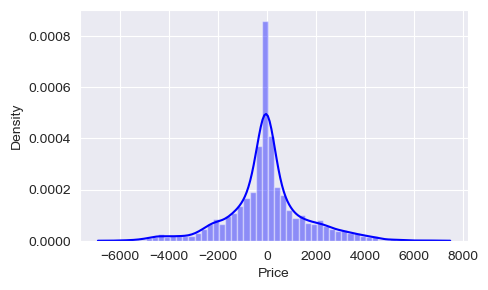

In [55]:
plt.figure(figsize=(5,3))
sns.distplot(ytest-ypredict, color='b');

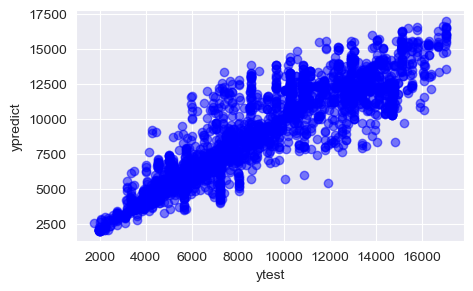

In [56]:
plt.figure(figsize=(5,3))
plt.scatter(ytest, ypredict, alpha = 0.5, color='b')
plt.xlabel("ytest")
plt.ylabel("ypredict")
plt.show()

In [57]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypredict))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ypredict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypredict)))

print('R square score:', metrics.r2_score(ytest,ypredict))

Mean Absolute Error: 1047.829804444149
Mean Squared Error: 2449325.9916260624
Root Mean Squared Error: 1565.0322653626226
R square score: 0.8296757776345689


# Hyperparameter Tuning

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

random_grid = {'n_estimators':[200,300,400],
               'max_features':['log2','sqrt',None],
               'max_depth':[5,10,15]}

rf=RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=random_grid,n_iter=10,cv=KFold(n_splits=10, shuffle=True, random_state=7))

rf.fit(xtrain,ytrain)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
                   estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15],
                                        'max_features': ['log2', 'sqrt', None],
                                        'n_estimators': [200, 300, 400]})

In [59]:
rf.best_params_

{'n_estimators': 200, 'max_features': None, 'max_depth': 10}

# Let's build our final model

In [60]:
rf_mod = RandomForestRegressor(n_estimators=200, max_features=None, max_depth=10)
rf_mod.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=10, max_features=None, n_estimators=200)

In [61]:
ypred=rf_mod.predict(xtest)

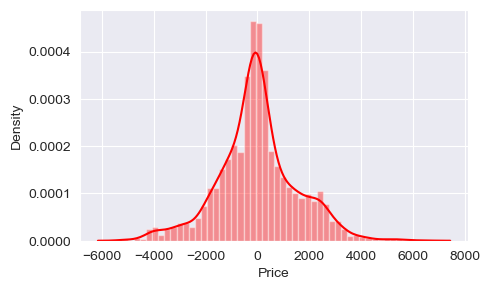

In [62]:
plt.figure(figsize=(5,3))
sns.distplot(ytest-ypred, color='r');

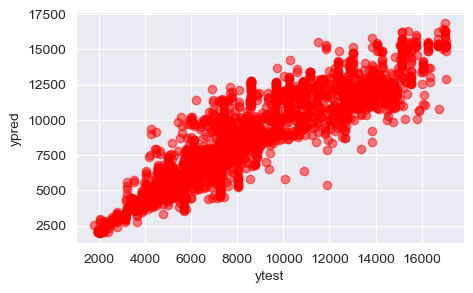

In [63]:
plt.figure(figsize=(5,3))
plt.scatter(ytest, ypred, alpha = 0.5, color='r')
plt.xlabel("ytest")
plt.ylabel("ypred")
plt.show()

In [64]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))

print('R square score:', metrics.r2_score(ytest,ypred))

Mean Absolute Error: 1104.707870147666
Mean Squared Error: 2302207.065898943
Root Mean Squared Error: 1517.3025624109857
R square score: 0.8399063131800124


In [65]:
# R-Square Score for train and test:
print("Train Score:",rf_mod.score(xtrain,ytrain))
print("Test Score:",rf_mod.score(xtest,ytest))

Train Score: 0.8689661784008206
Test Score: 0.8399063131800124


In [66]:
df=pd.DataFrame()
df['actual']=ytest
df['predicted']=ypred
df.head()

,actual,predicted
2564,7575,9286.624441
3288,8553,7820.804002
9616,13014,11954.083815
2756,9929,8988.260049
191,7165,7485.849489


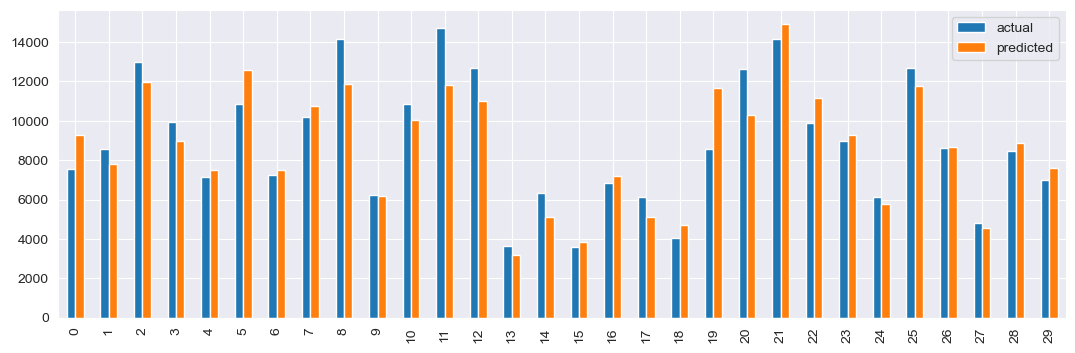

In [67]:
df.head(30).reset_index().plot(x=None, y=['actual','predicted'], kind='bar', figsize=(13,4))
plt.show()

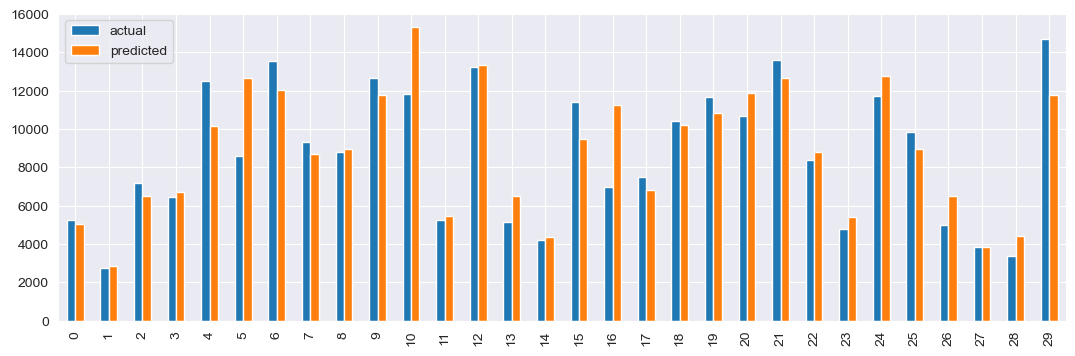

In [68]:
df.tail(30).reset_index().plot(x=None, y=['actual','predicted'], kind='bar', figsize=(13,4))
plt.show()

# Save the model

In [88]:
# Saving model as a pickle file:
import pickle
with open("Flight_Fare_Prediction.pickle",'wb') as file:
    pickle.dump(rf_mod, file)

In [89]:
# Save the column details in json file:
import json
columns={'data_columns':list(x.columns)}

with open("columns.json",'w') as file:
    json.dump(columns, file)

# Using the model

In [94]:
# Loading the model:
import pickle
with open("Flight_Fare_Prediction.pickle",'rb') as file:
    model=pickle.load(file)
    
file.close()

In [95]:
def pre_price():
    
    total_stops=int(input("Enter total stops: "))
    
    from datetime import datetime
    date=input("Enter the date in the format of YYYY-mm-dd HH:MM ")
    date_format='%Y-%m-%d %H:%M'
    dt=datetime.strptime(date, date_format)
    
    jor_date=dt.day
    jor_mon=dt.month
    jor_day=dt.weekday()
    dep_hr=dt.hour
    dep_min=dt.minute
    
    airline=input("Airline name: ")
    
    src=input("Source: ")
    src='Source_'+src
    
    dest=input("Destination: ")
    dest='Destination_'+dest
    
    a=np.zeros(len(x.columns))
    
    a[0]=total_stops
    a[1]=jor_date
    a[2]=jor_mon
    a[3]=jor_day
    a[4]=dep_hr
    a[5]=dep_min
    
    if (airline in x.columns):
        ind1=list(x.columns).index(airline)
        a[ind1]=1
    
    if (src in x.columns):
        ind2=list(x.columns).index(src)
        a[ind2]=1
    
    if (dest in x.columns):
        ind3=list(x.columns).index(dest)
        a[ind3]=1
        
    fair=model.predict([a])[0]
    
    return print("The Predicter Flight Fare from",src,"to",dest,"is: ",round(fair,2))

In [98]:
pre_price()

Enter total stops: 0
Enter the date in the format of YYYY-mm-dd HH:MM 2023-10-05 22:30
Airline name: Air India
Source: Chennai
Destination: Delhi
The Predicter Flight Fare from Source_Chennai to Destination_Delhi is:  6073.61


In [99]:
pre_price()

Enter total stops: 0
Enter the date in the format of YYYY-mm-dd HH:MM 2023-10-05 10:30
Airline name: Air India
Source: Chennai
Destination: Delhi
The Predicter Flight Fare from Source_Chennai to Destination_Delhi is:  6608.64


In [101]:
pre_price()

Enter total stops: 2
Enter the date in the format of YYYY-mm-dd HH:MM 2023-10-05 10:30
Airline name: Air India
Source: Chennai
Destination: Delhi
The Predicter Flight Fare from Source_Chennai to Destination_Delhi is:  12516.34


In [103]:
pre_price()

Enter total stops: 0
Enter the date in the format of YYYY-mm-dd HH:MM 2023-10-12 20:30
Airline name: Vistara
Source: Delhi
Destination: Hyderabad
The Predicter Flight Fare from Source_Delhi to Destination_Hyderabad is:  3935.77


In [104]:
pre_price()

Enter total stops: 0
Enter the date in the format of YYYY-mm-dd HH:MM 2023-10-12 10:35
Airline name: Vistara
Source: Delhi
Destination: Hyderabad
The Predicter Flight Fare from Source_Delhi to Destination_Hyderabad is:  4300.35
